In [25]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import random as rndm

In [2]:
model = load_model('WasteClassification_model.h5')



I0000 00:00:1749498539.912447    5722 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-09 22:49:00.198220: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'imgs/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 689 images belonging to 17 classes.


# | Confusion Matrix

22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 584ms/step


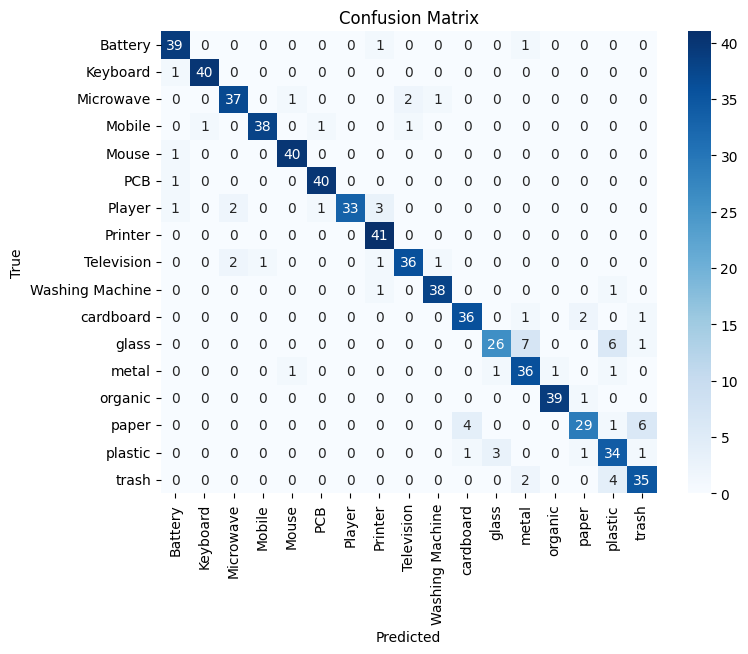

Classification Report:
                 precision    recall  f1-score   support

        Battery       0.91      0.95      0.93        41
       Keyboard       0.98      0.98      0.98        41
      Microwave       0.90      0.90      0.90        41
         Mobile       0.97      0.93      0.95        41
          Mouse       0.95      0.98      0.96        41
            PCB       0.95      0.98      0.96        41
         Player       1.00      0.82      0.90        40
        Printer       0.87      1.00      0.93        41
     Television       0.92      0.88      0.90        41
Washing Machine       0.95      0.95      0.95        40
      cardboard       0.88      0.90      0.89        40
          glass       0.87      0.65      0.74        40
          metal       0.77      0.90      0.83        40
        organic       0.97      0.97      0.97        40
          paper       0.88      0.72      0.79        40
        plastic       0.72      0.85      0.78        40
       

In [ ]:

predictions = model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes


class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


# | Per-Class Metrics

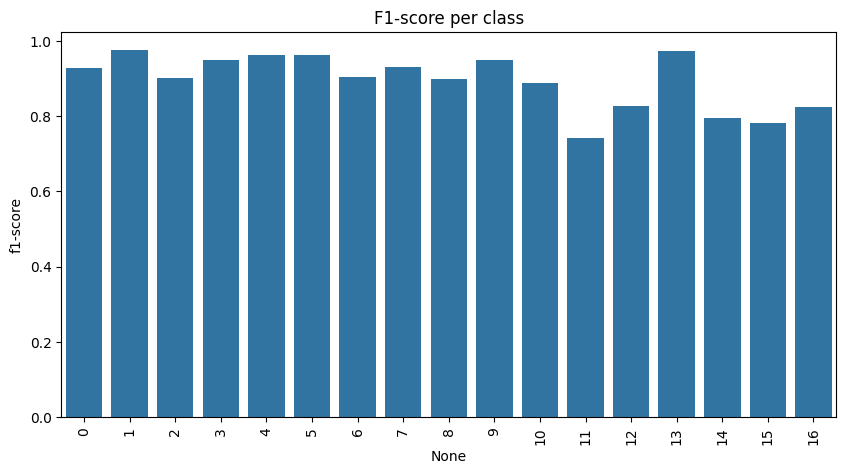

In [16]:
report = classification_report(y_true , y_pred ,output_dict=True)

df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 5))
sns.barplot(data=df[:-3], x=df.index[:-3], y='f1-score')
plt.xticks(rotation=90)
plt.title("F1-score per class")
plt.show()

# | Prediction on a Random Test Image

Testing on random image: dataset/garbage_images/organic/organic_001863_photo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


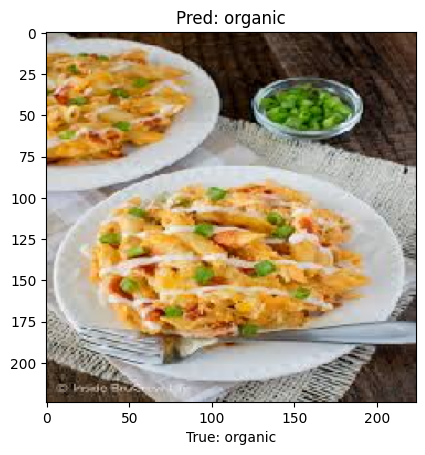

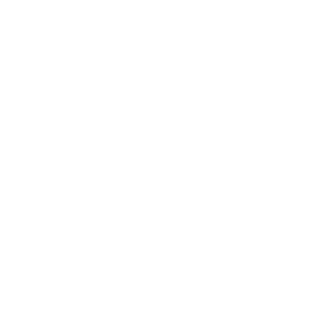

In [101]:

test_random_class = rndm.choice(os.listdir('dataset/garbage_images'))
test_random_image = rndm.choice(os.listdir(os.path.join('dataset/garbage_images', test_random_class)))
test_image_path = os.path.join('dataset/garbage_images', test_random_class, test_random_image)
print(f"Testing on random image: {test_image_path}")

img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array /= 255.0 
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

plt.imshow(img)
plt.title(f"Pred: {class_labels[predicted_class_index]}")
plt.xlabel(f"True: {test_random_class}")
plt.figure(figsize=(4,4))
plt.axis('off')
plt.show()